In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow_hub as tfhub
import cv2
import tensorflow as tf

In [3]:
model =tfhub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

2022-09-19 19:00:42.342914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-19 19:00:42.343271: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [8]:
def load_image(img_path):
  img=tf.io.read_file(img_path)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.convert_image_dtype(img,tf.dtypes.float32)
  img=img[tf.newaxis,:]
  return img

In [10]:
content_image=load_image("./Images/Content/Ladakh.jpeg")
style_image=load_image('./Images/Style/MonaLisa.jpeg')

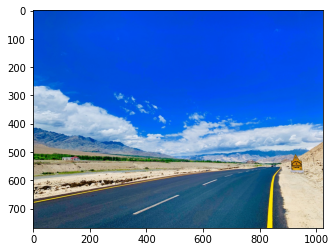

In [11]:
plt.imshow(np.squeeze(content_image))

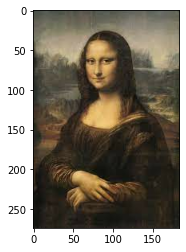

In [12]:
plt.imshow(np.squeeze(style_image))


In [13]:
final_img=model(tf.constant(content_image),tf.constant(style_image))

2022-09-19 19:51:19.605017: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-19 19:51:19.606686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


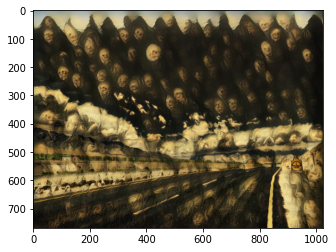

In [15]:
plt.imshow(np.squeeze(final_img))